# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Numpy utilities
import numpy as np

# File utilities
import os

# FIDIMAG Simulation imports:
from fidimag.atomistic import Sim
from fidimag.atomistic import FDMesh
from fidimag.atomistic import DMI
from fidimag.atomistic import UniformExchange
from fidimag.atomistic import Zeeman
from fidimag.atomistic import Constant

# Simulation

Here we load the finite differences mesh and create a Fidimag simulation object

In [3]:
# MESH --------------------------------------------------------------------
# This is a 21x21 spins in a square lattice with a lattice constant of 5
# angstrom and PBCs
mesh = FDMesh(nx=21, ny=21,
              dx=0.5, dy=0.5,
              unit_length=1e-9,
              pbc='2d'
              )

# Initiate a simulation object. PBCs are specified in the mesh
sim = Sim(mesh, name='relax_fm')


# Files

When the NEBM simulation is run, the files with the magnetisation configurations (one **.npy** file for every image in the energy band) are saved in the **npys/** folder, where the first and last step of the algorithm are saved by default. We will load all the **.npy** files from the final step folder, looking at the names of the directories inside *npys/* and then sorting out the names of the *.npy* files.

In [4]:
# Generate a list with the filenames of the last step of the
# NEBM from the npys files. We assume the only directories are
# the ones that start with: 'neb_21x21-spins_fm-sk_atomic_k1e10_'
l = len('neb_21x21-spins_fm-sk_atomic_k1e10_')
folder = 'npys/' + sorted(os.listdir('npys/'),
                          key=lambda x: int(x[l:]))[-1]

# Organise the npy files in the folder. We need to sort them
# according to their image number. Remeber that they are numbered
# as: image_13.npy ...  so we convert the string number to int
file_list = sorted(os.listdir(folder), key=lambda x: int(x[6:-4]))
file_list = [folder + '/' + _file for _file in file_list]

With the following code, we make a quiver plot of a *.npy* file in a given matplotlib axis *ax*. For this, we will pass a list of the *spins*, loading the *.npy* file into the simulation object (in the main loop in the next section). We assume that the coordinates for all the images are the same and that the spins list follow the order of the *coords* list.

In Fidimag, we get the coordinates as tuples with: `sim.mesh.pos`

And the spins for every coordinate with: `sim.spin`

In [5]:
coords = np.array(sim.mesh.pos)

def generate_image(ax, spins):
    """
    
    ax    :: Matplotlib axis object
    spins :: List with all the spins in the corresponding order
             from the coords array
    
    """
    m = np.copy(sim.spin).reshape(-1, 3)

    ax.quiver(coords[:, 0], coords[:, 1], 
              m[:, 0], m[:, 1], m[:, 2],
              # Arrow properties (can vary according to the plot)
              cmap='RdYlBu', width=.008, linewidth=1,
              scale=1 / 0.05,
              # Data limits for the colour map
              clim=[-1, 1]
              )

# Skyrmion destruction process

Here we plot every image loading the *.npy* files, in ascending order (already done when creating the file list). We observe that the 0th and 20th images are the stable configurations of the system, the skyrmion and the ferromagnetic ordering. In the process, we see the skyrmion destruction when its core is shrunk.

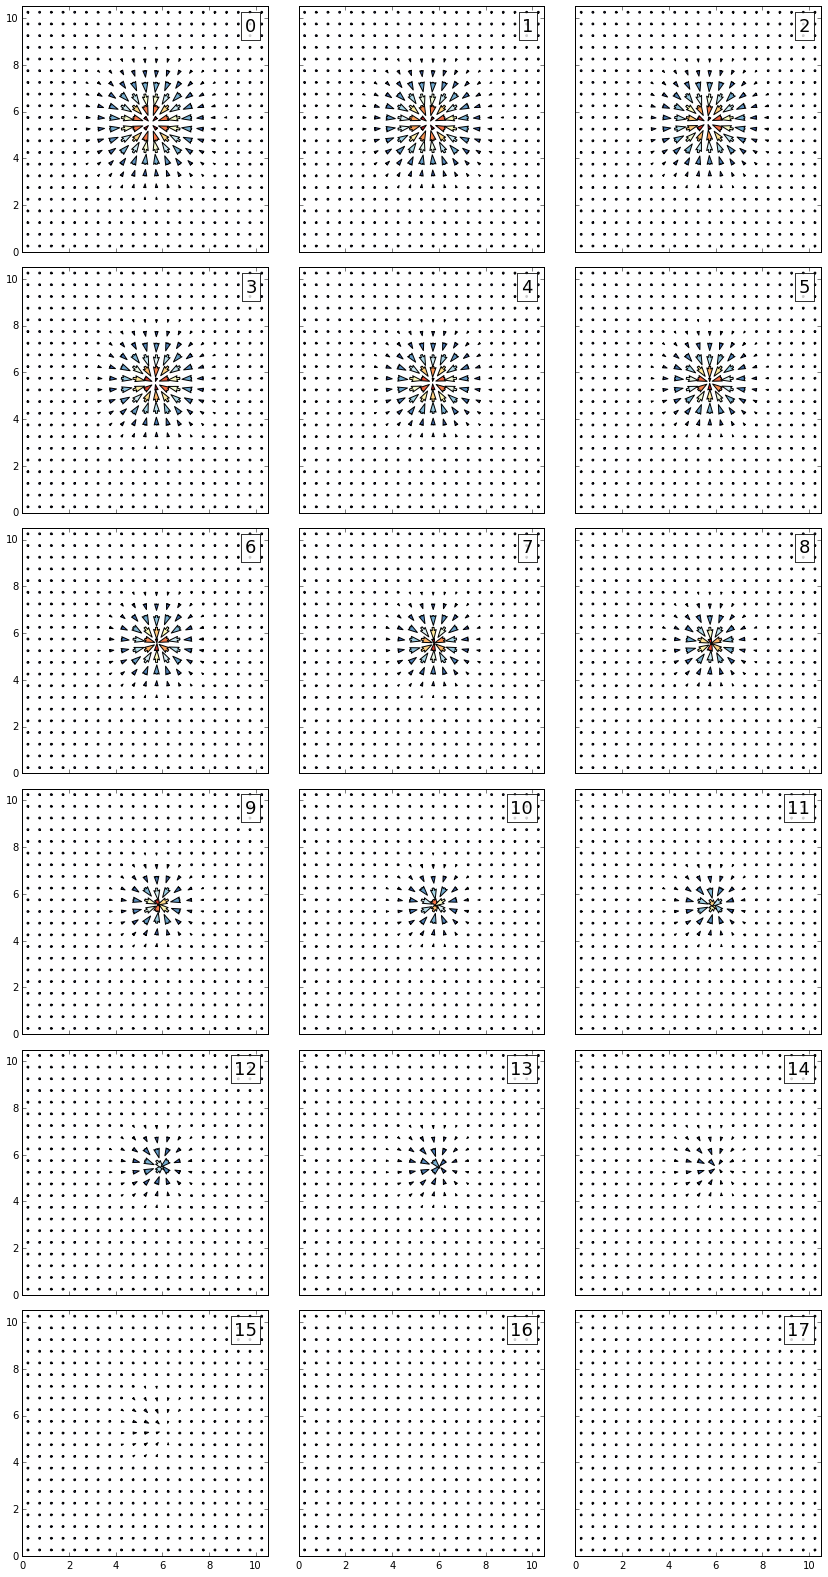

In [6]:
fig = plt.figure(figsize=(12, 22))
# fig, axes = plot.subplots(nrows=6, ncols=3,
#                           sharex=True, sharey=True)

for i in np.arange(len(file_list)):
    sim.set_m(np.load(file_list[i]))
    ax = fig.add_subplot(6, 3, i + 1, aspect=1)
    generate_image(ax, sim.spin)

    ax.set_xlim([0, 10.5])
    ax.set_ylim([0, 10.5])
    
    ax.text(0.95, 0.9, 
            '{}'.format(i),
            transform=ax.transAxes, fontsize=18,
            horizontalalignment='right',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10}
           )

for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass
    
plt.tight_layout()

We can get the energy band importing the plot file (*plot_ebds.py*):

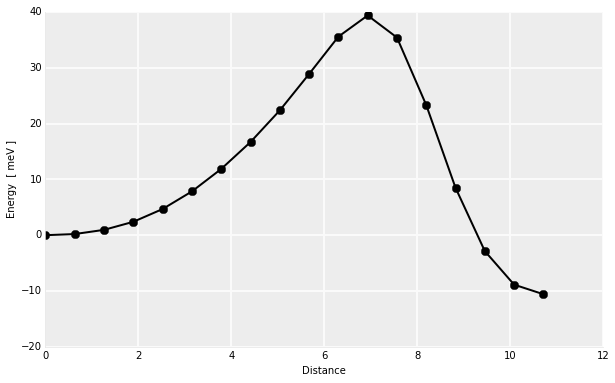

In [7]:
import plot_ebds